# Python TFM Section

## Modelling
1. Compare several models and use the most suitable for this case of study
2. Train and Test the final model and set it up implemented
3. Final conclusions

In [102]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
%pylab inline
plt.style.use('ggplot')
from pathlib import Path
import sklearn

Populating the interactive namespace from numpy and matplotlib


In [103]:
df_modelize = pd.read_csv(Path.cwd() / 'Outputs' / 'DF_MODELIZE.csv', sep = ';', header = 0 , encoding = "ISO-8859-1",decimal=',')
df_modelize.head(5)

,VERSION,ID_UPR,ID_TECNOLOGIA,A. No Cobrados,AMONIACO,ATR,Ajuste,BONO_SOCIAL_PEGO,Banda,Bilateral,...,Res. Pot. Adicional,S. Regulacion,S. Res. Pot. Adicional,SERV_GEST_RES,TASAS_MEDIOAMB,TASA_ARAGON,Terciaria,UREA,VCF,POWER_MWH
0,201701,UPR115,NC,NaN,NaN,NaN,NaN,NaN,NaN,81778497.0,...,NaN,NaN,-36.0,-5156083.0,NaN,NaN,NaN,NaN,NaN,1111803.766
1,201701,UPR116,NC,NaN,NaN,NaN,NaN,NaN,NaN,68455391.0,...,NaN,NaN,NaN,-4357224.0,NaN,NaN,NaN,NaN,NaN,940091.558
2,201701,UPR1198,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-192.0,NaN,NaN,NaN,NaN,NaN,NaN,-1418.032
3,201701,UPR1205,EB,NaN,NaN,NaN,-124366.0,NaN,NaN,1578792.0,...,NaN,NaN,-455.0,NaN,-33711.0,NaN,55144.0,NaN,NaN,22830.702
4,201701,UPR1206,BX,NaN,NaN,NaN,-9972.0,NaN,NaN,NaN,...,NaN,NaN,-7.0,NaN,-16346.0,NaN,NaN,NaN,NaN,-418.593


Before aplying any model:

1. All NaNs are now filled with 0s 
2. I will create a synthetic column named INTEGRAL_MARGIN with the sum of all the euros 
3. I will inspect the graphical aspect of the data
4. After watching it, I decided to drop all the outliers of every column and watch it again

In [104]:
df_modelize = df_modelize.fillna(0)

df_modelize['INTEGRAL_MARGIN']  = \
df_modelize['A. No Cobrados'] + \
df_modelize['AMONIACO'] + \
df_modelize['ATR'] + \
df_modelize['Ajuste'] + \
df_modelize['BONO_SOCIAL_PEGO'] + \
df_modelize['Banda'] + \
df_modelize['Bilateral'] + \
df_modelize['CALIZAS'] + \
df_modelize['CANON HID'] + \
df_modelize['CANON_CONCESION'] + \
df_modelize['CANON_HID_CATALUÃÂA'] + \
df_modelize['CANON_NC_CATALUÃÂA'] + \
df_modelize['CANON_NC_EST'] + \
df_modelize['CENTIMO_VERDE'] + \
df_modelize['COSTE_COMBUSTIBLE'] + \
df_modelize['D. Medida Contador'] + \
df_modelize['G. Desvios'] + \
df_modelize['G. Potencia LP'] + \
df_modelize['G. Potencia MP'] + \
df_modelize['I. G. DesvÃ­os y Terciaria'] + \
df_modelize['I. R. Cobertura'] +  \
df_modelize['I. Res. Pot. Adicional'] + \
df_modelize['IMPUESTO ELECT'] + \
df_modelize['LUBRICANTES'] + \
df_modelize['M. Diario'] + \
df_modelize['M. Intradiario Continuo'] + \
df_modelize['M. Intradiarios'] + \
df_modelize['OTROS'] + \
df_modelize['PEAJE GEN'] +  \
df_modelize['R. Cobertura'] + \
df_modelize['R. Secundaria'] + \
df_modelize['RELIQ_CANON_NC_CATALUÃÂA'] +  \
df_modelize['Redespachos'] + \
df_modelize['Res. Pot. Adicional'] +  \
df_modelize['S. Regulacion'] + \
df_modelize['S. Res. Pot. Adicional'] + \
df_modelize['SERV_GEST_RES'] + \
df_modelize['TASAS_MEDIOAMB'] + \
df_modelize['TASA_ARAGON'] + \
df_modelize['Terciaria'] + \
df_modelize['VCF'] 

df_modelize.head(10)

,VERSION,ID_UPR,ID_TECNOLOGIA,A. No Cobrados,AMONIACO,ATR,Ajuste,BONO_SOCIAL_PEGO,Banda,Bilateral,...,S. Regulacion,S. Res. Pot. Adicional,SERV_GEST_RES,TASAS_MEDIOAMB,TASA_ARAGON,Terciaria,UREA,VCF,POWER_MWH,INTEGRAL_MARGIN
0,201701,UPR115,NC,0.0,0.0,0.0,0.0,0.0,0.0,81778497.0,...,0.0,-36.0,-5156083.0,0.0,0.0,0.0,0.0,0.0,1111803.766,68991367.0
1,201701,UPR116,NC,0.0,0.0,0.0,0.0,0.0,0.0,68455391.0,...,0.0,0.0,-4357224.0,0.0,0.0,0.0,0.0,0.0,940091.558,57329124.0
2,201701,UPR1198,NC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-192.0,0.0,0.0,0.0,0.0,0.0,0.0,-1418.032,-35497.0
3,201701,UPR1205,EB,0.0,0.0,0.0,-124366.0,0.0,0.0,1578792.0,...,0.0,-455.0,0.0,-33711.0,0.0,55144.0,0.0,0.0,22830.702,1628652.0
4,201701,UPR1206,BX,0.0,0.0,0.0,-9972.0,0.0,0.0,0.0,...,0.0,-7.0,0.0,-16346.0,0.0,0.0,0.0,0.0,-418.593,-40860.0
5,201701,UPR1207,EB,0.0,0.0,0.0,-198314.0,0.0,15066.0,59653.0,...,0.0,-807.0,0.0,-1528.0,0.0,225821.0,0.0,999.0,11909.436,1165056.0
6,201701,UPR1314,BP,0.0,0.0,0.0,-429377.0,0.0,0.0,-118383.0,...,0.0,-39.0,0.0,0.0,0.0,-24031.0,0.0,0.0,-13631.195,-687111.0
7,201701,UPR1315,BP,0.0,0.0,0.0,-506708.0,0.0,2001.0,0.0,...,0.0,-397.0,0.0,0.0,0.0,441646.0,0.0,-162.0,10253.552,933419.0
8,201701,UPR160,GN,-994654.0,0.0,-938689.0,0.0,0.0,1045907.0,0.0,...,0.0,-2223.0,0.0,0.0,0.0,251416.0,0.0,-14892.0,84359.878,5616333.0
9,201701,UPR162,GN,-418200.0,0.0,-507356.0,0.0,0.0,957825.0,0.0,...,0.0,-316.0,0.0,0.0,0.0,573346.0,0.0,-17674.0,109060.598,13326546.0


In [105]:
df_modelize2 = df_modelize[['ID_TECNOLOGIA','POWER_MWH','INTEGRAL_MARGIN']]
df_tech= df_modelize2[['ID_TECNOLOGIA']].drop_duplicates()
df_tech['NUM_TECH']= [1,2,3,4,5,6,7,8]
df_tech.reset_index
df_modelize2 = pd.merge(df_modelize2, df_tech, on=['ID_TECNOLOGIA'], how='left')
df_modelize2 = df_modelize2[['POWER_MWH','INTEGRAL_MARGIN','NUM_TECH']]


df_modelize2.sort_values('INTEGRAL_MARGIN').tail(5)

,POWER_MWH,INTEGRAL_MARGIN,NUM_TECH
872,25252754.63,1.786557e+09,1
1000,30433835.04,1.852227e+09,1
828,29264447.52,1.863768e+09,1
913,32620485.17,2.102639e+09,1
871,29867406.09,2.108922e+09,1


I represent all the data graphically for watching the distribution and see how prone to be clustered those centrals are. 

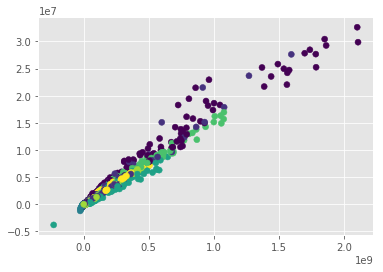

In [106]:
plt.scatter(df_modelize2['INTEGRAL_MARGIN'],df_modelize2['POWER_MWH'],c=df_modelize2['NUM_TECH'])

I discard the outliers which are bigger than 2 times the standard desviation, that means keeping the percentile 95 of every data.

I used directly the fuction zcore from stats to have the calcule directly instead of using the mean and the standard deviation.

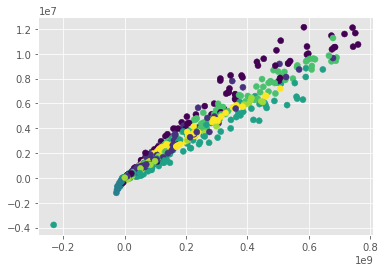

In [107]:
from scipy import stats
df_modelize3= df_modelize2[(np.abs(stats.zscore(df_modelize2)) < 2).all(axis=1)].reset_index()
plt.scatter(df_modelize3['INTEGRAL_MARGIN'],df_modelize3['POWER_MWH'],c=df_modelize3['NUM_TECH'])

There are still some values too low that I don't want to take into account , so I will drop it manually

In [108]:
df_modelize3.sort_values('INTEGRAL_MARGIN').head(3)

,index,POWER_MWH,INTEGRAL_MARGIN,NUM_TECH
761,784,-3789073.00,-230711843.0,5
610,623,-1206169.48,-26556006.0,4
650,666,-968546.08,-24686687.0,4


In [109]:
df_modelize3=df_modelize3.drop(df_modelize3.index[761])

In [110]:
df_modelize3.sort_values('INTEGRAL_MARGIN').head(3)

,index,POWER_MWH,INTEGRAL_MARGIN,NUM_TECH
610,623,-1206169.480,-26556006.0,4
650,666,-968546.080,-24686687.0,4
509,513,-682677.543,-23179375.0,4


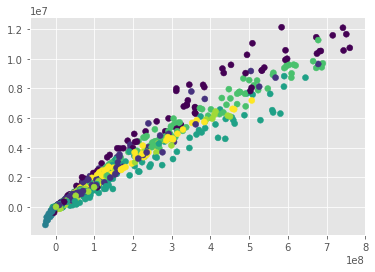

In [111]:
plt.scatter(df_modelize3['INTEGRAL_MARGIN'],df_modelize3['POWER_MWH'],c=df_modelize3['NUM_TECH'])

From this representation, seems clear than the behaviour of the different technologies is pretty similar when at first I supposed it won't... Let's go look for the meaning of this

1. I apply a matrix correlation to see how much weight does the differnt costs and profits to the integral margin
2. We see that the profits are extremely hight against the costs.
    - Since every technology is sold with the same price in the electric market no matter what are it's implied costs, the profits columns does not really matter in the proces of predicting 
3. We recalculate now the margin but only with the costs-part selected (without: Bilateral , M. Diario , R. Cobertura , M.Intradiarios




                             VERSION  A. No Cobrados  AMONIACO       ATR  \
VERSION                     1.000000        0.020186 -0.062207 -0.077740   
A. No Cobrados              0.020186        1.000000 -0.000212 -0.072734   
AMONIACO                   -0.062207       -0.000212  1.000000 -0.052883   
ATR                        -0.077740       -0.072734 -0.052883  1.000000   
Ajuste                     -0.112995       -0.004622  0.125565 -0.105980   
BONO_SOCIAL_PEGO           -0.041916       -0.000480 -0.045029  0.456660   
Banda                       0.179281       -0.002619 -0.152812 -0.464028   
Bilateral                   0.189340        0.000983  0.041376  0.091215   
CALIZAS                    -0.083343        0.000023  0.441714 -0.064592   
CANON HID                  -0.072172       -0.000452 -0.042318 -0.053855   
CANON_CONCESION            -0.099276       -0.000235 -0.020024 -0.027572   
CANON_HID_CATALUÃÂA      -0.050004       -0.000121 -0.011361 -0.014458   
CANON_NC_CAT

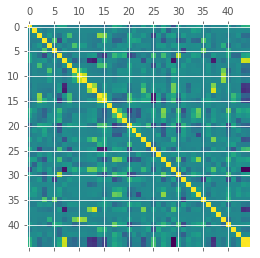

In [112]:
print(df_modelize.corr())
plt.matshow(df_modelize.corr())
plt.show()

I will repeat the whole previous process altogether for having the new distribution of costs for technologie

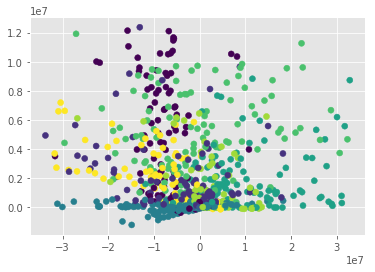

In [113]:
df_modelize4 = df_modelize.drop(columns=['INTEGRAL_MARGIN', 'Bilateral' , 'M. Diario' , 'R. Cobertura' , 'M. Intradiarios'])

df_modelize4['INTEGRAL_MARGIN']  = \
df_modelize4['A. No Cobrados'] + \
df_modelize4['AMONIACO'] + \
df_modelize4['ATR'] + \
df_modelize4['Ajuste'] + \
df_modelize4['BONO_SOCIAL_PEGO'] + \
df_modelize4['Banda'] + \
df_modelize4['CALIZAS'] + \
df_modelize4['CANON HID'] + \
df_modelize4['CANON_CONCESION'] + \
df_modelize4['CANON_HID_CATALUÃÂA'] + \
df_modelize4['CANON_NC_CATALUÃÂA'] + \
df_modelize4['CANON_NC_EST'] + \
df_modelize4['CENTIMO_VERDE'] + \
df_modelize4['COSTE_COMBUSTIBLE'] + \
df_modelize4['D. Medida Contador'] + \
df_modelize4['G. Desvios'] + \
df_modelize4['G. Potencia LP'] + \
df_modelize4['G. Potencia MP'] + \
df_modelize4['I. G. DesvÃ­os y Terciaria'] + \
df_modelize4['I. R. Cobertura'] +  \
df_modelize4['I. Res. Pot. Adicional'] + \
df_modelize4['IMPUESTO ELECT'] + \
df_modelize4['LUBRICANTES'] + \
df_modelize4['M. Intradiario Continuo'] + \
df_modelize4['OTROS'] + \
df_modelize4['PEAJE GEN'] +  \
df_modelize4['R. Secundaria'] + \
df_modelize4['RELIQ_CANON_NC_CATALUÃÂA'] +  \
df_modelize4['Redespachos'] + \
df_modelize4['Res. Pot. Adicional'] +  \
df_modelize4['S. Regulacion'] + \
df_modelize4['S. Res. Pot. Adicional'] + \
df_modelize4['SERV_GEST_RES'] + \
df_modelize4['TASAS_MEDIOAMB'] + \
df_modelize4['TASA_ARAGON'] + \
df_modelize4['Terciaria'] + \
df_modelize4['VCF'] 

df_modelize5 = df_modelize4[['VERSION','ID_TECNOLOGIA','POWER_MWH','INTEGRAL_MARGIN']]
df_modelize5 = pd.merge(df_modelize5, df_tech, on=['ID_TECNOLOGIA'], how='left')
df_modelize5 = df_modelize5[['VERSION','POWER_MWH','INTEGRAL_MARGIN','NUM_TECH']]

df_modelize5= df_modelize5[(np.abs(stats.zscore(df_modelize5)) < 2).all(axis=1)].reset_index()
plt.scatter(df_modelize5['INTEGRAL_MARGIN'],df_modelize5['POWER_MWH'],c=df_modelize5['NUM_TECH'])


In [114]:
#df_modelize4.to_csv...

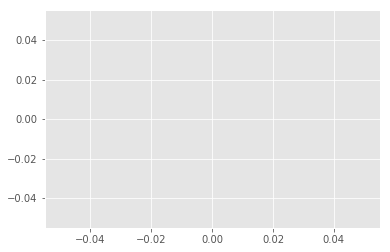

In [115]:
MES = 20171
plt.scatter(df_modelize5[df_modelize5['VERSION'] == MES]['INTEGRAL_MARGIN'],df_modelize5[df_modelize5['VERSION'] == MES]['POWER_MWH'],c=df_modelize5[df_modelize5['VERSION'] == MES]['NUM_TECH'])

In [116]:
df_modelize5.head(2)

,index,VERSION,POWER_MWH,INTEGRAL_MARGIN,NUM_TECH
0,0,201701,1111803.766,-12782669.0,1
1,1,201701,940091.558,-11203096.0,1


# Model Aplication

First, I proceed to separate the data frame into Train-Test parts

For that, I divide the original df into two parts with the inputs on the matrix X and the  outputs desired on the matrix y
and the metric used for the evaluation at first will be MAE

## Instances Creation

In [117]:
# Import Library
from sklearn.model_selection import train_test_split

X = df_modelize5[['VERSION','NUM_TECH','POWER_MWH']]
y = df_modelize5['INTEGRAL_MARGIN']


# Create Instance
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10 , random_state = 42)

## First aproach: Linear Regressor

In [136]:
# Load the library
from sklearn.linear_model import LinearRegression
# Create an instance of the model
regL = LinearRegression()
# Fit the regressor
regL.fit(X_train,y_train)
# Do predictions
y_regL_pred = regL.predict(X_test)

Let's check the mean absolute error as well as the distribution of the diferences between the test and the predictions

7848612.780082843


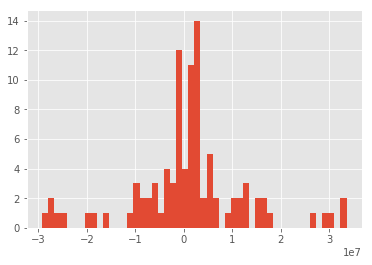

In [137]:
print(np.mean(np.abs(y_test-y_regL_pred)))
plt.hist(y_test-y_regL_pred,bins=50);

## Second Aproach: KNeighbors

In [235]:
# Load the library
from sklearn.neighbors import KNeighborsRegressor
# Create an instance
regKN = KNeighborsRegressor(n_neighbors=20)
# Fit the data
regKN.fit(X_train,y_train)
# Do predictions
y_regKN_pred = regKN.predict(X_test)

7782316.906842102


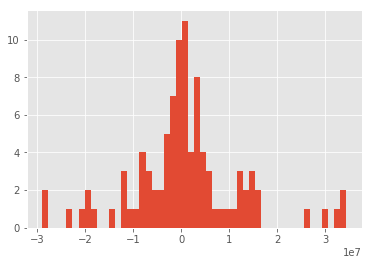

In [236]:
print(np.mean(np.abs(y_test-y_regKN_pred)))
plt.hist(y_test-y_regKN_pred,bins=50);

Now, I will apply a GridSearchCV to see how this could be improved

In [249]:
# Import Library
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Create instance
regGsCvKN = GridSearchCV(KNeighborsRegressor(),
                  param_grid = {"n_neighbors":np.arange(3,50)},
                  cv=5,
                  scoring="neg_mean_absolute_error",
                  verbose=9)
                     
                      
# Fit will test all of the combinations
regGsCvKN.fit(X,y)


print(regGsCvKN.best_params_)
print(regGsCvKN.best_score_)

Fitting 5 folds for each of 47 candidates, totalling 235 fits
[CV] n_neighbors=3 ...................................................
[CV] .......... n_neighbors=3, score=-5258646.047368421, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .......... n_neighbors=3, score=-7853609.485964912, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .......... n_neighbors=3, score=-8795497.196491227, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .......... n_neighbors=3, score=-7939932.617543859, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .......... n_neighbors=3, score=-8813620.333333334, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] .......... n_neighbors=4, score=-5376123.794736842, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s



[CV] n_neighbors=6 ...................................................
[CV] ........... n_neighbors=6, score=-7753158.55263158, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] .......... n_neighbors=6, score=-8427670.185087718, total=   0.0s
[CV] n_neighbors=7 ...................................................
[CV] .......... n_neighbors=7, score=-4819371.854135339, total=   0.0s
[CV] n_neighbors=7 ...................................................
[CV] .......... n_neighbors=7, score=-7081360.998496239, total=   0.0s
[CV] n_neighbors=7 ...................................................
[CV] .......... n_neighbors=7, score=-7154977.481203007, total=   0.0s
[CV] n_neighbors=7 ...................................................
[CV] .......... n_neighbors=7, score=-7766985.718796993, total=   0.0s
[CV] n_neighbors=7 ...................................................
[CV] .......... n_neighbors=7, score=-8425118.335338345, total=   0.0s
[CV] 

[CV] ......... n_neighbors=21, score=-6239063.343358397, total=   0.0s
[CV] n_neighbors=21 ..................................................
[CV] ......... n_neighbors=21, score=-6741378.807518796, total=   0.0s
[CV] n_neighbors=21 ..................................................
[CV] ......... n_neighbors=21, score=-7604425.323809523, total=   0.0s
[CV] n_neighbors=21 ..................................................
[CV] .......... n_neighbors=21, score=-8155346.67744361, total=   0.0s
[CV] n_neighbors=22 ..................................................
[CV] ......... n_neighbors=22, score=-4480208.143062201, total=   0.0s
[CV] n_neighbors=22 ..................................................
[CV] ......... n_neighbors=22, score=-6212865.491866029, total=   0.0s
[CV] n_neighbors=22 ..................................................
[CV] ......... n_neighbors=22, score=-6704814.691626794, total=   0.0s
[CV] n_neighbors=22 ..................................................
[CV] .

[CV] ......... n_neighbors=32, score=-8109373.549506579, total=   0.0s
[CV] n_neighbors=33 ..................................................
[CV] ......... n_neighbors=33, score=-4434470.123444976, total=   0.0s
[CV] n_neighbors=33 ..................................................
[CV] ......... n_neighbors=33, score=-6061940.065709729, total=   0.0s
[CV] n_neighbors=33 ..................................................
[CV] ........... n_neighbors=33, score=-6481366.6354067, total=   0.0s
[CV] n_neighbors=33 ..................................................
[CV] ......... n_neighbors=33, score=-7451141.795055821, total=   0.0s
[CV] n_neighbors=33 ..................................................
[CV] ......... n_neighbors=33, score=-8135394.231738438, total=   0.0s
[CV] n_neighbors=34 ..................................................
[CV] ......... n_neighbors=34, score=-4428072.642879256, total=   0.0s
[CV] n_neighbors=34 ..................................................
[CV] .

[CV] ......... n_neighbors=45, score=-4360600.687953216, total=   0.0s
[CV] n_neighbors=45 ..................................................
[CV] ......... n_neighbors=45, score=-5949211.898362574, total=   0.0s
[CV] n_neighbors=45 ..................................................
[CV] ......... n_neighbors=45, score=-6459365.014619882, total=   0.0s
[CV] n_neighbors=45 ..................................................
[CV] ........ n_neighbors=45, score=-7439430.5994152045, total=   0.0s
[CV] n_neighbors=45 ..................................................
[CV] ......... n_neighbors=45, score=-8073420.869473684, total=   0.0s
[CV] n_neighbors=46 ..................................................
[CV] ........ n_neighbors=46, score=-4365050.9236842105, total=   0.0s
[CV] n_neighbors=46 ..................................................
[CV] ......... n_neighbors=46, score=-5931208.902974829, total=   0.0s
[CV] n_neighbors=46 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 235 out of 235 | elapsed:    2.7s finished


In [250]:
regGsKN = regGsCvKN.best_estimator_

In [251]:
# Do predictions
y_regGsKN_pred = regGsKN.predict(X_test)

7648329.1254004575


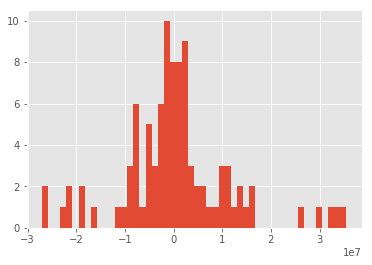

In [252]:
print(np.mean(np.abs(y_test-y_regGsKN_pred)))
plt.hist(y_test-y_regGsKN_pred,bins=50);

## Third: Decision Trees

In [253]:
# Load the library
from sklearn.tree import DecisionTreeRegressor
# Create an instance
regDT = DecisionTreeRegressor(max_depth=10)
# Fit the data
regDT.fit(X_train,y_train)
# Do predictions
y_regDT_pred = regDT.predict(X_test)

4380360.147893903


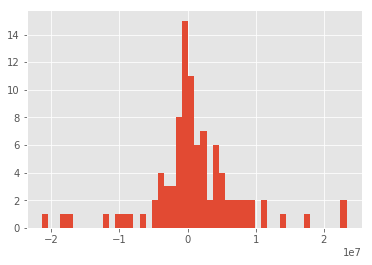

In [254]:
print(np.mean(np.abs(y_test-y_regDT_pred)))
plt.hist(y_test-y_regDT_pred,bins=50);

In [255]:
# Import Library
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Create instance
regRF = GridSearchCV(RandomForestRegressor(n_jobs=-1),
                  param_grid = {"min_samples_leaf":[10,20,30,40,50,60,70,80,90,100],
                               "max_depth":np.arange(1,5),
                               "n_estimators":[10,20,30,40,50,60,70,80,90,100]},
                  cv=5,
                  scoring="neg_mean_absolute_error",
                  verbose=9)
                     
                     
# Fit will test all of the combinations
regRF.fit(X_train,y_train)


print(regRF.best_params_)
print(regRF.best_score_)

regRFF = regRF.best_estimator_

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] max_depth=1, min_samples_leaf=10, n_estimators=10 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=1, min_samples_leaf=10, n_estimators=10, score=-6732190.808994988, total=   2.6s
[CV] max_depth=1, min_samples_leaf=10, n_estimators=10 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=10, n_estimators=10, score=-5795210.665050953, total=   0.0s
[CV] max_depth=1, min_samples_leaf=10, n_estimators=10 ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=10, n_estimators=10, score=-6605019.827767785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=10, n_estimators=10 ...............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.2s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=10, n_estimators=10, score=-6472144.960076203, total=   0.0s
[CV] max_depth=1, min_samples_leaf=10, n_estimators=10 ...............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=10, n_estimators=10, score=-5680297.67592728, total=   0.0s
[CV] max_depth=1, min_samples_leaf=10, n_estimators=20 ...............


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.7s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=10, n_estimators=20, score=-6900358.348864749, total=   0.0s
[CV] max_depth=1, min_samples_leaf=10, n_estimators=20 ...............


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.9s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=10, n_estimators=20, score=-5856204.357556106, total=   0.0s
[CV] max_depth=1, min_samples_leaf=10, n_estimators=20 ...............


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.2s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=10, n_estimators=20, score=-6473573.002124707, total=   0.0s
[CV] max_depth=1, min_samples_leaf=10, n_estimators=20 ...............


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.4s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=10, n_estimators=20, score=-6450648.929517347, total=   0.0s
[CV] max_depth=1, min_samples_leaf=10, n_estimators=20 ...............
[CV]  max_depth=1, min_samples_leaf=10, n_estimators=20, score=-5718122.541620866, total=   0.0s
[CV] max_depth=1, min_samples_leaf=10, n_estimators=30 ...............
[CV]  max_depth=1, min_samples_leaf=10, n_estimators=30, score=-6819714.9875806775, total=   0.0s
[CV] max_depth=1, min_samples_leaf=10, n_estimators=30 ...............
[CV]  max_depth=1, min_samples_leaf=10, n_estimators=30, score=-5646322.125538331, total=   0.1s
[CV] max_depth=1, min_samples_leaf=10, n_estimators=30 ...............
[CV]  max_depth=1, min_samples_leaf=10, n_estimators=30, score=-6378094.385522436, total=   0.1s
[CV] max_depth=1, min_samples_leaf=10, n_estimators=30 ...............
[CV]  max_depth=1, min_samples_leaf=10, n_estimators=30, score=-6456830.091298257, total=   0.1s
[CV] max_depth=1, min_samples_leaf=10, n_estimators=30 .......

[CV]  max_depth=1, min_samples_leaf=20, n_estimators=20, score=-6467566.778363331, total=   0.0s
[CV] max_depth=1, min_samples_leaf=20, n_estimators=20 ...............
[CV]  max_depth=1, min_samples_leaf=20, n_estimators=20, score=-6474826.250859667, total=   0.0s
[CV] max_depth=1, min_samples_leaf=20, n_estimators=20 ...............
[CV]  max_depth=1, min_samples_leaf=20, n_estimators=20, score=-5663390.365980869, total=   0.0s
[CV] max_depth=1, min_samples_leaf=20, n_estimators=30 ...............
[CV]  max_depth=1, min_samples_leaf=20, n_estimators=30, score=-6770487.868533455, total=   0.1s
[CV] max_depth=1, min_samples_leaf=20, n_estimators=30 ...............
[CV]  max_depth=1, min_samples_leaf=20, n_estimators=30, score=-5659025.072471542, total=   0.1s
[CV] max_depth=1, min_samples_leaf=20, n_estimators=30 ...............
[CV]  max_depth=1, min_samples_leaf=20, n_estimators=30, score=-6410810.080997821, total=   0.1s
[CV] max_depth=1, min_samples_leaf=20, n_estimators=30 ........

[CV]  max_depth=1, min_samples_leaf=30, n_estimators=20, score=-5735767.60665568, total=   0.0s
[CV] max_depth=1, min_samples_leaf=30, n_estimators=20 ...............
[CV]  max_depth=1, min_samples_leaf=30, n_estimators=20, score=-6489816.725613614, total=   0.0s
[CV] max_depth=1, min_samples_leaf=30, n_estimators=20 ...............
[CV]  max_depth=1, min_samples_leaf=30, n_estimators=20, score=-6521264.9309623465, total=   0.1s
[CV] max_depth=1, min_samples_leaf=30, n_estimators=20 ...............
[CV]  max_depth=1, min_samples_leaf=30, n_estimators=20, score=-5705452.698804393, total=   0.0s
[CV] max_depth=1, min_samples_leaf=30, n_estimators=30 ...............
[CV]  max_depth=1, min_samples_leaf=30, n_estimators=30, score=-6833320.288353269, total=   0.0s
[CV] max_depth=1, min_samples_leaf=30, n_estimators=30 ...............
[CV]  max_depth=1, min_samples_leaf=30, n_estimators=30, score=-5663612.08928804, total=   0.1s
[CV] max_depth=1, min_samples_leaf=30, n_estimators=30 .........

[CV]  max_depth=1, min_samples_leaf=40, n_estimators=20, score=-6867390.660470021, total=   0.0s
[CV] max_depth=1, min_samples_leaf=40, n_estimators=20 ...............
[CV]  max_depth=1, min_samples_leaf=40, n_estimators=20, score=-5923593.90293374, total=   0.1s
[CV] max_depth=1, min_samples_leaf=40, n_estimators=20 ...............
[CV]  max_depth=1, min_samples_leaf=40, n_estimators=20, score=-6484625.090466162, total=   0.0s
[CV] max_depth=1, min_samples_leaf=40, n_estimators=20 ...............
[CV]  max_depth=1, min_samples_leaf=40, n_estimators=20, score=-6598959.6664286135, total=   0.0s
[CV] max_depth=1, min_samples_leaf=40, n_estimators=20 ...............
[CV]  max_depth=1, min_samples_leaf=40, n_estimators=20, score=-5810878.1124562, total=   0.0s
[CV] max_depth=1, min_samples_leaf=40, n_estimators=30 ...............
[CV]  max_depth=1, min_samples_leaf=40, n_estimators=30, score=-6943913.744125877, total=   0.1s
[CV] max_depth=1, min_samples_leaf=40, n_estimators=30 ..........

[CV]  max_depth=1, min_samples_leaf=50, n_estimators=10, score=-5903832.9382799305, total=   0.0s
[CV] max_depth=1, min_samples_leaf=50, n_estimators=20 ...............
[CV]  max_depth=1, min_samples_leaf=50, n_estimators=20, score=-6984015.282850439, total=   0.0s
[CV] max_depth=1, min_samples_leaf=50, n_estimators=20 ...............
[CV]  max_depth=1, min_samples_leaf=50, n_estimators=20, score=-5948992.232272068, total=   0.0s
[CV] max_depth=1, min_samples_leaf=50, n_estimators=20 ...............
[CV]  max_depth=1, min_samples_leaf=50, n_estimators=20, score=-6567435.543353369, total=   0.0s
[CV] max_depth=1, min_samples_leaf=50, n_estimators=20 ...............
[CV]  max_depth=1, min_samples_leaf=50, n_estimators=20, score=-6591363.682315123, total=   0.0s
[CV] max_depth=1, min_samples_leaf=50, n_estimators=20 ...............
[CV]  max_depth=1, min_samples_leaf=50, n_estimators=20, score=-5850089.354838044, total=   0.0s
[CV] max_depth=1, min_samples_leaf=50, n_estimators=30 .......

[CV]  max_depth=1, min_samples_leaf=60, n_estimators=10, score=-6767938.110629278, total=   0.0s
[CV] max_depth=1, min_samples_leaf=60, n_estimators=10 ...............
[CV]  max_depth=1, min_samples_leaf=60, n_estimators=10, score=-5819920.460878732, total=   0.0s
[CV] max_depth=1, min_samples_leaf=60, n_estimators=20 ...............
[CV]  max_depth=1, min_samples_leaf=60, n_estimators=20, score=-6867687.355128439, total=   0.0s
[CV] max_depth=1, min_samples_leaf=60, n_estimators=20 ...............
[CV]  max_depth=1, min_samples_leaf=60, n_estimators=20, score=-5923526.414865559, total=   0.0s
[CV] max_depth=1, min_samples_leaf=60, n_estimators=20 ...............
[CV]  max_depth=1, min_samples_leaf=60, n_estimators=20, score=-6548596.977013397, total=   0.1s
[CV] max_depth=1, min_samples_leaf=60, n_estimators=20 ...............
[CV]  max_depth=1, min_samples_leaf=60, n_estimators=20, score=-6563154.499459755, total=   0.0s
[CV] max_depth=1, min_samples_leaf=60, n_estimators=20 ........

[CV]  max_depth=1, min_samples_leaf=70, n_estimators=10, score=-6564993.8327879915, total=   0.0s
[CV] max_depth=1, min_samples_leaf=70, n_estimators=10 ...............
[CV]  max_depth=1, min_samples_leaf=70, n_estimators=10, score=-6695936.857920852, total=   0.0s
[CV] max_depth=1, min_samples_leaf=70, n_estimators=10 ...............
[CV]  max_depth=1, min_samples_leaf=70, n_estimators=10, score=-5901952.165769841, total=   0.0s
[CV] max_depth=1, min_samples_leaf=70, n_estimators=20 ...............
[CV]  max_depth=1, min_samples_leaf=70, n_estimators=20, score=-7000580.333149414, total=   0.0s
[CV] max_depth=1, min_samples_leaf=70, n_estimators=20 ...............
[CV]  max_depth=1, min_samples_leaf=70, n_estimators=20, score=-5932073.12414531, total=   0.0s
[CV] max_depth=1, min_samples_leaf=70, n_estimators=20 ...............
[CV]  max_depth=1, min_samples_leaf=70, n_estimators=20, score=-6512017.122712141, total=   0.0s
[CV] max_depth=1, min_samples_leaf=70, n_estimators=20 ........

[CV]  max_depth=1, min_samples_leaf=80, n_estimators=10, score=-5913027.268907544, total=   0.0s
[CV] max_depth=1, min_samples_leaf=80, n_estimators=10 ...............
[CV]  max_depth=1, min_samples_leaf=80, n_estimators=10, score=-6607059.488858475, total=   0.0s
[CV] max_depth=1, min_samples_leaf=80, n_estimators=10 ...............
[CV]  max_depth=1, min_samples_leaf=80, n_estimators=10, score=-6640873.387073691, total=   0.0s
[CV] max_depth=1, min_samples_leaf=80, n_estimators=10 ...............
[CV]  max_depth=1, min_samples_leaf=80, n_estimators=10, score=-5905328.10915933, total=   0.0s
[CV] max_depth=1, min_samples_leaf=80, n_estimators=20 ...............
[CV]  max_depth=1, min_samples_leaf=80, n_estimators=20, score=-6975679.172384209, total=   0.0s
[CV] max_depth=1, min_samples_leaf=80, n_estimators=20 ...............
[CV]  max_depth=1, min_samples_leaf=80, n_estimators=20, score=-6012860.131471032, total=   0.0s
[CV] max_depth=1, min_samples_leaf=80, n_estimators=20 .........

[CV]  max_depth=1, min_samples_leaf=90, n_estimators=10, score=-6987470.661021068, total=   0.0s
[CV] max_depth=1, min_samples_leaf=90, n_estimators=10 ...............
[CV]  max_depth=1, min_samples_leaf=90, n_estimators=10, score=-5996638.856234018, total=   0.0s
[CV] max_depth=1, min_samples_leaf=90, n_estimators=10 ...............
[CV]  max_depth=1, min_samples_leaf=90, n_estimators=10, score=-6562528.624991274, total=   0.0s
[CV] max_depth=1, min_samples_leaf=90, n_estimators=10 ...............
[CV]  max_depth=1, min_samples_leaf=90, n_estimators=10, score=-6721085.093185871, total=   0.0s
[CV] max_depth=1, min_samples_leaf=90, n_estimators=10 ...............
[CV]  max_depth=1, min_samples_leaf=90, n_estimators=10, score=-5869310.398045441, total=   0.0s
[CV] max_depth=1, min_samples_leaf=90, n_estimators=20 ...............
[CV]  max_depth=1, min_samples_leaf=90, n_estimators=20, score=-6906281.685598042, total=   0.0s
[CV] max_depth=1, min_samples_leaf=90, n_estimators=20 ........

[CV]  max_depth=1, min_samples_leaf=90, n_estimators=100, score=-5860007.882874486, total=   0.2s
[CV] max_depth=1, min_samples_leaf=100, n_estimators=10 ..............
[CV]  max_depth=1, min_samples_leaf=100, n_estimators=10, score=-7030257.736026948, total=   0.0s
[CV] max_depth=1, min_samples_leaf=100, n_estimators=10 ..............
[CV]  max_depth=1, min_samples_leaf=100, n_estimators=10, score=-5907751.163195631, total=   0.0s
[CV] max_depth=1, min_samples_leaf=100, n_estimators=10 ..............
[CV]  max_depth=1, min_samples_leaf=100, n_estimators=10, score=-6446604.421805264, total=   0.0s
[CV] max_depth=1, min_samples_leaf=100, n_estimators=10 ..............
[CV]  max_depth=1, min_samples_leaf=100, n_estimators=10, score=-6677685.708299191, total=   0.0s
[CV] max_depth=1, min_samples_leaf=100, n_estimators=10 ..............
[CV]  max_depth=1, min_samples_leaf=100, n_estimators=10, score=-5753415.0699034585, total=   0.0s
[CV] max_depth=1, min_samples_leaf=100, n_estimators=20 

[CV]  max_depth=1, min_samples_leaf=100, n_estimators=100, score=-6648651.518280175, total=   0.1s
[CV] max_depth=1, min_samples_leaf=100, n_estimators=100 .............
[CV]  max_depth=1, min_samples_leaf=100, n_estimators=100, score=-5854423.69379253, total=   0.1s
[CV] max_depth=2, min_samples_leaf=10, n_estimators=10 ...............
[CV]  max_depth=2, min_samples_leaf=10, n_estimators=10, score=-6139214.22520594, total=   0.0s
[CV] max_depth=2, min_samples_leaf=10, n_estimators=10 ...............
[CV]  max_depth=2, min_samples_leaf=10, n_estimators=10, score=-5238626.194784211, total=   0.0s
[CV] max_depth=2, min_samples_leaf=10, n_estimators=10 ...............
[CV]  max_depth=2, min_samples_leaf=10, n_estimators=10, score=-5517537.87675841, total=   0.0s
[CV] max_depth=2, min_samples_leaf=10, n_estimators=10 ...............
[CV]  max_depth=2, min_samples_leaf=10, n_estimators=10, score=-5957445.522875506, total=   0.1s
[CV] max_depth=2, min_samples_leaf=10, n_estimators=10 .......

[CV]  max_depth=2, min_samples_leaf=10, n_estimators=100, score=-5525951.997678254, total=   0.1s
[CV] max_depth=2, min_samples_leaf=10, n_estimators=100 ..............
[CV]  max_depth=2, min_samples_leaf=10, n_estimators=100, score=-5952735.944911668, total=   0.1s
[CV] max_depth=2, min_samples_leaf=10, n_estimators=100 ..............
[CV]  max_depth=2, min_samples_leaf=10, n_estimators=100, score=-5354308.027061978, total=   0.3s
[CV] max_depth=2, min_samples_leaf=20, n_estimators=10 ...............
[CV]  max_depth=2, min_samples_leaf=20, n_estimators=10, score=-6191402.961554695, total=   0.1s
[CV] max_depth=2, min_samples_leaf=20, n_estimators=10 ...............
[CV]  max_depth=2, min_samples_leaf=20, n_estimators=10, score=-5184790.698614279, total=   0.0s
[CV] max_depth=2, min_samples_leaf=20, n_estimators=10 ...............
[CV]  max_depth=2, min_samples_leaf=20, n_estimators=10, score=-5456724.6344419755, total=   0.0s
[CV] max_depth=2, min_samples_leaf=20, n_estimators=10 ....

[CV]  max_depth=2, min_samples_leaf=20, n_estimators=100, score=-5154904.5695340885, total=   0.1s
[CV] max_depth=2, min_samples_leaf=20, n_estimators=100 ..............
[CV]  max_depth=2, min_samples_leaf=20, n_estimators=100, score=-5540236.955133654, total=   0.1s
[CV] max_depth=2, min_samples_leaf=20, n_estimators=100 ..............
[CV]  max_depth=2, min_samples_leaf=20, n_estimators=100, score=-6057839.0684051085, total=   0.1s
[CV] max_depth=2, min_samples_leaf=20, n_estimators=100 ..............
[CV]  max_depth=2, min_samples_leaf=20, n_estimators=100, score=-5366569.181104686, total=   0.1s
[CV] max_depth=2, min_samples_leaf=30, n_estimators=10 ...............
[CV]  max_depth=2, min_samples_leaf=30, n_estimators=10, score=-6200942.023093681, total=   0.0s
[CV] max_depth=2, min_samples_leaf=30, n_estimators=10 ...............
[CV]  max_depth=2, min_samples_leaf=30, n_estimators=10, score=-5405702.195814145, total=   0.0s
[CV] max_depth=2, min_samples_leaf=30, n_estimators=10 ..

[CV]  max_depth=2, min_samples_leaf=30, n_estimators=100, score=-6181948.587486634, total=   0.1s
[CV] max_depth=2, min_samples_leaf=30, n_estimators=100 ..............
[CV]  max_depth=2, min_samples_leaf=30, n_estimators=100, score=-5207839.129213515, total=   0.1s
[CV] max_depth=2, min_samples_leaf=30, n_estimators=100 ..............
[CV]  max_depth=2, min_samples_leaf=30, n_estimators=100, score=-5474651.167809964, total=   0.1s
[CV] max_depth=2, min_samples_leaf=30, n_estimators=100 ..............
[CV]  max_depth=2, min_samples_leaf=30, n_estimators=100, score=-6053192.094275652, total=   0.1s
[CV] max_depth=2, min_samples_leaf=30, n_estimators=100 ..............
[CV]  max_depth=2, min_samples_leaf=30, n_estimators=100, score=-5387841.217889296, total=   0.1s
[CV] max_depth=2, min_samples_leaf=40, n_estimators=10 ...............
[CV]  max_depth=2, min_samples_leaf=40, n_estimators=10, score=-6118001.71795695, total=   0.0s
[CV] max_depth=2, min_samples_leaf=40, n_estimators=10 ....

[CV]  max_depth=2, min_samples_leaf=40, n_estimators=90, score=-5522691.278774393, total=   0.2s
[CV] max_depth=2, min_samples_leaf=40, n_estimators=100 ..............
[CV]  max_depth=2, min_samples_leaf=40, n_estimators=100, score=-6212551.46891762, total=   0.1s
[CV] max_depth=2, min_samples_leaf=40, n_estimators=100 ..............
[CV]  max_depth=2, min_samples_leaf=40, n_estimators=100, score=-5496521.334968382, total=   0.1s
[CV] max_depth=2, min_samples_leaf=40, n_estimators=100 ..............
[CV]  max_depth=2, min_samples_leaf=40, n_estimators=100, score=-5445123.281445464, total=   0.1s
[CV] max_depth=2, min_samples_leaf=40, n_estimators=100 ..............
[CV]  max_depth=2, min_samples_leaf=40, n_estimators=100, score=-6066724.884742117, total=   0.1s
[CV] max_depth=2, min_samples_leaf=40, n_estimators=100 ..............
[CV]  max_depth=2, min_samples_leaf=40, n_estimators=100, score=-5504961.455783753, total=   0.1s
[CV] max_depth=2, min_samples_leaf=50, n_estimators=10 ....

[CV]  max_depth=2, min_samples_leaf=50, n_estimators=90, score=-6085744.411476153, total=   0.1s
[CV] max_depth=2, min_samples_leaf=50, n_estimators=90 ...............
[CV]  max_depth=2, min_samples_leaf=50, n_estimators=90, score=-5524973.87862548, total=   0.1s
[CV] max_depth=2, min_samples_leaf=50, n_estimators=100 ..............
[CV]  max_depth=2, min_samples_leaf=50, n_estimators=100, score=-6246671.283002833, total=   0.1s
[CV] max_depth=2, min_samples_leaf=50, n_estimators=100 ..............
[CV]  max_depth=2, min_samples_leaf=50, n_estimators=100, score=-5466005.558102928, total=   0.1s
[CV] max_depth=2, min_samples_leaf=50, n_estimators=100 ..............
[CV]  max_depth=2, min_samples_leaf=50, n_estimators=100, score=-5485251.892861245, total=   0.1s
[CV] max_depth=2, min_samples_leaf=50, n_estimators=100 ..............
[CV]  max_depth=2, min_samples_leaf=50, n_estimators=100, score=-6090037.992497387, total=   0.1s
[CV] max_depth=2, min_samples_leaf=50, n_estimators=100 ....

[CV]  max_depth=2, min_samples_leaf=60, n_estimators=90, score=-5511286.405123739, total=   0.1s
[CV] max_depth=2, min_samples_leaf=60, n_estimators=90 ...............
[CV]  max_depth=2, min_samples_leaf=60, n_estimators=90, score=-6121694.218515471, total=   0.1s
[CV] max_depth=2, min_samples_leaf=60, n_estimators=90 ...............
[CV]  max_depth=2, min_samples_leaf=60, n_estimators=90, score=-5473138.804623907, total=   0.1s
[CV] max_depth=2, min_samples_leaf=60, n_estimators=100 ..............
[CV]  max_depth=2, min_samples_leaf=60, n_estimators=100, score=-6277978.897534932, total=   0.1s
[CV] max_depth=2, min_samples_leaf=60, n_estimators=100 ..............
[CV]  max_depth=2, min_samples_leaf=60, n_estimators=100, score=-5385688.0752961775, total=   0.1s
[CV] max_depth=2, min_samples_leaf=60, n_estimators=100 ..............
[CV]  max_depth=2, min_samples_leaf=60, n_estimators=100, score=-5522264.57645618, total=   0.1s
[CV] max_depth=2, min_samples_leaf=60, n_estimators=100 ....

[CV]  max_depth=2, min_samples_leaf=70, n_estimators=90, score=-5449133.366973577, total=   0.1s
[CV] max_depth=2, min_samples_leaf=70, n_estimators=90 ...............
[CV]  max_depth=2, min_samples_leaf=70, n_estimators=90, score=-5965747.109943922, total=   0.1s
[CV] max_depth=2, min_samples_leaf=70, n_estimators=90 ...............
[CV]  max_depth=2, min_samples_leaf=70, n_estimators=90, score=-6274814.747093067, total=   0.1s
[CV] max_depth=2, min_samples_leaf=70, n_estimators=90 ...............
[CV]  max_depth=2, min_samples_leaf=70, n_estimators=90, score=-5414433.045136679, total=   0.1s
[CV] max_depth=2, min_samples_leaf=70, n_estimators=100 ..............
[CV]  max_depth=2, min_samples_leaf=70, n_estimators=100, score=-6432481.802834352, total=   0.1s
[CV] max_depth=2, min_samples_leaf=70, n_estimators=100 ..............
[CV]  max_depth=2, min_samples_leaf=70, n_estimators=100, score=-5444257.460527659, total=   0.1s
[CV] max_depth=2, min_samples_leaf=70, n_estimators=100 .....

[CV]  max_depth=2, min_samples_leaf=80, n_estimators=90, score=-6435888.697231042, total=   0.1s
[CV] max_depth=2, min_samples_leaf=80, n_estimators=90 ...............
[CV]  max_depth=2, min_samples_leaf=80, n_estimators=90, score=-5583566.725645365, total=   0.1s
[CV] max_depth=2, min_samples_leaf=80, n_estimators=90 ...............
[CV]  max_depth=2, min_samples_leaf=80, n_estimators=90, score=-6054047.9144780105, total=   0.1s
[CV] max_depth=2, min_samples_leaf=80, n_estimators=90 ...............
[CV]  max_depth=2, min_samples_leaf=80, n_estimators=90, score=-6384325.835539731, total=   0.1s
[CV] max_depth=2, min_samples_leaf=80, n_estimators=90 ...............
[CV]  max_depth=2, min_samples_leaf=80, n_estimators=90, score=-5674583.560069323, total=   0.1s
[CV] max_depth=2, min_samples_leaf=80, n_estimators=100 ..............
[CV]  max_depth=2, min_samples_leaf=80, n_estimators=100, score=-6466388.948105958, total=   0.1s
[CV] max_depth=2, min_samples_leaf=80, n_estimators=100 .....

[CV]  max_depth=2, min_samples_leaf=90, n_estimators=80, score=-5832340.5068218885, total=   0.1s
[CV] max_depth=2, min_samples_leaf=90, n_estimators=90 ...............
[CV]  max_depth=2, min_samples_leaf=90, n_estimators=90, score=-6589176.102788429, total=   0.1s
[CV] max_depth=2, min_samples_leaf=90, n_estimators=90 ...............
[CV]  max_depth=2, min_samples_leaf=90, n_estimators=90, score=-5646655.0583323175, total=   0.1s
[CV] max_depth=2, min_samples_leaf=90, n_estimators=90 ...............
[CV]  max_depth=2, min_samples_leaf=90, n_estimators=90, score=-5997816.175422138, total=   0.1s
[CV] max_depth=2, min_samples_leaf=90, n_estimators=90 ...............
[CV]  max_depth=2, min_samples_leaf=90, n_estimators=90, score=-6477702.662450104, total=   0.1s
[CV] max_depth=2, min_samples_leaf=90, n_estimators=90 ...............
[CV]  max_depth=2, min_samples_leaf=90, n_estimators=90, score=-5817432.590709325, total=   0.1s
[CV] max_depth=2, min_samples_leaf=90, n_estimators=100 .....

[CV]  max_depth=2, min_samples_leaf=100, n_estimators=80, score=-6525210.577145933, total=   0.1s
[CV] max_depth=2, min_samples_leaf=100, n_estimators=80 ..............
[CV]  max_depth=2, min_samples_leaf=100, n_estimators=80, score=-5708250.905801833, total=   0.1s
[CV] max_depth=2, min_samples_leaf=100, n_estimators=90 ..............
[CV]  max_depth=2, min_samples_leaf=100, n_estimators=90, score=-6701430.434447038, total=   0.1s
[CV] max_depth=2, min_samples_leaf=100, n_estimators=90 ..............
[CV]  max_depth=2, min_samples_leaf=100, n_estimators=90, score=-5676917.9328190945, total=   0.1s
[CV] max_depth=2, min_samples_leaf=100, n_estimators=90 ..............
[CV]  max_depth=2, min_samples_leaf=100, n_estimators=90, score=-6136225.483233306, total=   0.1s
[CV] max_depth=2, min_samples_leaf=100, n_estimators=90 ..............
[CV]  max_depth=2, min_samples_leaf=100, n_estimators=90, score=-6523064.587143492, total=   0.1s
[CV] max_depth=2, min_samples_leaf=100, n_estimators=90 

[CV]  max_depth=3, min_samples_leaf=10, n_estimators=80, score=-4943591.37839614, total=   0.1s
[CV] max_depth=3, min_samples_leaf=10, n_estimators=80 ...............
[CV]  max_depth=3, min_samples_leaf=10, n_estimators=80, score=-5682497.715801398, total=   0.1s
[CV] max_depth=3, min_samples_leaf=10, n_estimators=80 ...............
[CV]  max_depth=3, min_samples_leaf=10, n_estimators=80, score=-5080084.914846996, total=   0.1s
[CV] max_depth=3, min_samples_leaf=10, n_estimators=90 ...............
[CV]  max_depth=3, min_samples_leaf=10, n_estimators=90, score=-5867597.157195344, total=   0.1s
[CV] max_depth=3, min_samples_leaf=10, n_estimators=90 ...............
[CV]  max_depth=3, min_samples_leaf=10, n_estimators=90, score=-4780347.642076884, total=   0.1s
[CV] max_depth=3, min_samples_leaf=10, n_estimators=90 ...............
[CV]  max_depth=3, min_samples_leaf=10, n_estimators=90, score=-4950600.750317267, total=   0.1s
[CV] max_depth=3, min_samples_leaf=10, n_estimators=90 .........

[CV]  max_depth=3, min_samples_leaf=20, n_estimators=80, score=-4782232.299372615, total=   0.1s
[CV] max_depth=3, min_samples_leaf=20, n_estimators=80 ...............
[CV]  max_depth=3, min_samples_leaf=20, n_estimators=80, score=-5114125.565476383, total=   0.1s
[CV] max_depth=3, min_samples_leaf=20, n_estimators=80 ...............
[CV]  max_depth=3, min_samples_leaf=20, n_estimators=80, score=-5660612.996368689, total=   0.1s
[CV] max_depth=3, min_samples_leaf=20, n_estimators=80 ...............
[CV]  max_depth=3, min_samples_leaf=20, n_estimators=80, score=-5134330.514198974, total=   0.1s
[CV] max_depth=3, min_samples_leaf=20, n_estimators=90 ...............
[CV]  max_depth=3, min_samples_leaf=20, n_estimators=90, score=-5968663.454794266, total=   0.1s
[CV] max_depth=3, min_samples_leaf=20, n_estimators=90 ...............
[CV]  max_depth=3, min_samples_leaf=20, n_estimators=90, score=-4823210.556799536, total=   0.2s
[CV] max_depth=3, min_samples_leaf=20, n_estimators=90 ........

[CV]  max_depth=3, min_samples_leaf=30, n_estimators=80, score=-5873528.816356419, total=   0.1s
[CV] max_depth=3, min_samples_leaf=30, n_estimators=80 ...............
[CV]  max_depth=3, min_samples_leaf=30, n_estimators=80, score=-4951955.186476423, total=   0.1s
[CV] max_depth=3, min_samples_leaf=30, n_estimators=80 ...............
[CV]  max_depth=3, min_samples_leaf=30, n_estimators=80, score=-5012846.88382013, total=   0.1s
[CV] max_depth=3, min_samples_leaf=30, n_estimators=80 ...............
[CV]  max_depth=3, min_samples_leaf=30, n_estimators=80, score=-5643594.749496609, total=   0.1s
[CV] max_depth=3, min_samples_leaf=30, n_estimators=80 ...............
[CV]  max_depth=3, min_samples_leaf=30, n_estimators=80, score=-5140866.321421376, total=   0.1s
[CV] max_depth=3, min_samples_leaf=30, n_estimators=90 ...............
[CV]  max_depth=3, min_samples_leaf=30, n_estimators=90, score=-5897621.249597246, total=   0.2s
[CV] max_depth=3, min_samples_leaf=30, n_estimators=90 .........

[CV]  max_depth=3, min_samples_leaf=40, n_estimators=70, score=-5245538.477738487, total=   0.1s
[CV] max_depth=3, min_samples_leaf=40, n_estimators=80 ...............
[CV]  max_depth=3, min_samples_leaf=40, n_estimators=80, score=-5780019.383372437, total=   0.2s
[CV] max_depth=3, min_samples_leaf=40, n_estimators=80 ...............
[CV]  max_depth=3, min_samples_leaf=40, n_estimators=80, score=-5252314.358686679, total=   0.1s
[CV] max_depth=3, min_samples_leaf=40, n_estimators=80 ...............
[CV]  max_depth=3, min_samples_leaf=40, n_estimators=80, score=-5103197.004693941, total=   0.1s
[CV] max_depth=3, min_samples_leaf=40, n_estimators=80 ...............
[CV]  max_depth=3, min_samples_leaf=40, n_estimators=80, score=-5862671.761817056, total=   0.1s
[CV] max_depth=3, min_samples_leaf=40, n_estimators=80 ...............
[CV]  max_depth=3, min_samples_leaf=40, n_estimators=80, score=-5253106.578097817, total=   0.2s
[CV] max_depth=3, min_samples_leaf=40, n_estimators=90 ........

[CV]  max_depth=3, min_samples_leaf=50, n_estimators=70, score=-5842418.472825202, total=   0.1s
[CV] max_depth=3, min_samples_leaf=50, n_estimators=70 ...............
[CV]  max_depth=3, min_samples_leaf=50, n_estimators=70, score=-5307052.319866291, total=   0.1s
[CV] max_depth=3, min_samples_leaf=50, n_estimators=80 ...............
[CV]  max_depth=3, min_samples_leaf=50, n_estimators=80, score=-5809439.60484846, total=   0.1s
[CV] max_depth=3, min_samples_leaf=50, n_estimators=80 ...............
[CV]  max_depth=3, min_samples_leaf=50, n_estimators=80, score=-5250011.605857106, total=   0.1s
[CV] max_depth=3, min_samples_leaf=50, n_estimators=80 ...............
[CV]  max_depth=3, min_samples_leaf=50, n_estimators=80, score=-5158335.939758193, total=   0.1s
[CV] max_depth=3, min_samples_leaf=50, n_estimators=80 ...............
[CV]  max_depth=3, min_samples_leaf=50, n_estimators=80, score=-5855786.643585845, total=   0.1s
[CV] max_depth=3, min_samples_leaf=50, n_estimators=80 .........

[CV]  max_depth=3, min_samples_leaf=60, n_estimators=70, score=-5228838.906158271, total=   0.1s
[CV] max_depth=3, min_samples_leaf=60, n_estimators=70 ...............
[CV]  max_depth=3, min_samples_leaf=60, n_estimators=70, score=-5889628.260845834, total=   0.1s
[CV] max_depth=3, min_samples_leaf=60, n_estimators=70 ...............
[CV]  max_depth=3, min_samples_leaf=60, n_estimators=70, score=-5175935.798133821, total=   0.1s
[CV] max_depth=3, min_samples_leaf=60, n_estimators=80 ...............
[CV]  max_depth=3, min_samples_leaf=60, n_estimators=80, score=-5935803.569203133, total=   0.1s
[CV] max_depth=3, min_samples_leaf=60, n_estimators=80 ...............
[CV]  max_depth=3, min_samples_leaf=60, n_estimators=80, score=-5050102.054660808, total=   0.1s
[CV] max_depth=3, min_samples_leaf=60, n_estimators=80 ...............
[CV]  max_depth=3, min_samples_leaf=60, n_estimators=80, score=-5207787.155278366, total=   0.1s
[CV] max_depth=3, min_samples_leaf=60, n_estimators=80 ........

[CV]  max_depth=3, min_samples_leaf=70, n_estimators=70, score=-5299746.895560721, total=   0.1s
[CV] max_depth=3, min_samples_leaf=70, n_estimators=70 ...............
[CV]  max_depth=3, min_samples_leaf=70, n_estimators=70, score=-5679350.95024912, total=   0.1s
[CV] max_depth=3, min_samples_leaf=70, n_estimators=70 ...............
[CV]  max_depth=3, min_samples_leaf=70, n_estimators=70, score=-6034464.814169142, total=   0.1s
[CV] max_depth=3, min_samples_leaf=70, n_estimators=70 ...............
[CV]  max_depth=3, min_samples_leaf=70, n_estimators=70, score=-5133104.629830122, total=   0.1s
[CV] max_depth=3, min_samples_leaf=70, n_estimators=80 ...............
[CV]  max_depth=3, min_samples_leaf=70, n_estimators=80, score=-6289296.870171667, total=   0.1s
[CV] max_depth=3, min_samples_leaf=70, n_estimators=80 ...............
[CV]  max_depth=3, min_samples_leaf=70, n_estimators=80, score=-5288270.440794016, total=   0.1s
[CV] max_depth=3, min_samples_leaf=70, n_estimators=80 .........

[CV]  max_depth=3, min_samples_leaf=80, n_estimators=70, score=-6431591.943621184, total=   0.1s
[CV] max_depth=3, min_samples_leaf=80, n_estimators=70 ...............
[CV]  max_depth=3, min_samples_leaf=80, n_estimators=70, score=-5560475.805593317, total=   0.1s
[CV] max_depth=3, min_samples_leaf=80, n_estimators=70 ...............
[CV]  max_depth=3, min_samples_leaf=80, n_estimators=70, score=-6024524.912306665, total=   0.1s
[CV] max_depth=3, min_samples_leaf=80, n_estimators=70 ...............
[CV]  max_depth=3, min_samples_leaf=80, n_estimators=70, score=-6318137.249308379, total=   0.1s
[CV] max_depth=3, min_samples_leaf=80, n_estimators=70 ...............
[CV]  max_depth=3, min_samples_leaf=80, n_estimators=70, score=-5568232.876847753, total=   0.1s
[CV] max_depth=3, min_samples_leaf=80, n_estimators=80 ...............
[CV]  max_depth=3, min_samples_leaf=80, n_estimators=80, score=-6401881.388754103, total=   0.1s
[CV] max_depth=3, min_samples_leaf=80, n_estimators=80 ........

[CV]  max_depth=3, min_samples_leaf=90, n_estimators=60, score=-5787235.522965391, total=   0.1s
[CV] max_depth=3, min_samples_leaf=90, n_estimators=70 ...............
[CV]  max_depth=3, min_samples_leaf=90, n_estimators=70, score=-6586772.788944175, total=   0.1s
[CV] max_depth=3, min_samples_leaf=90, n_estimators=70 ...............
[CV]  max_depth=3, min_samples_leaf=90, n_estimators=70, score=-5619892.486874593, total=   0.1s
[CV] max_depth=3, min_samples_leaf=90, n_estimators=70 ...............
[CV]  max_depth=3, min_samples_leaf=90, n_estimators=70, score=-6008650.412826786, total=   0.1s
[CV] max_depth=3, min_samples_leaf=90, n_estimators=70 ...............
[CV]  max_depth=3, min_samples_leaf=90, n_estimators=70, score=-6499382.134098081, total=   0.1s
[CV] max_depth=3, min_samples_leaf=90, n_estimators=70 ...............
[CV]  max_depth=3, min_samples_leaf=90, n_estimators=70, score=-5775825.260159624, total=   0.1s
[CV] max_depth=3, min_samples_leaf=90, n_estimators=80 ........

[CV]  max_depth=3, min_samples_leaf=100, n_estimators=60, score=-6549748.595543421, total=   0.1s
[CV] max_depth=3, min_samples_leaf=100, n_estimators=60 ..............
[CV]  max_depth=3, min_samples_leaf=100, n_estimators=60, score=-5754524.06502768, total=   0.1s
[CV] max_depth=3, min_samples_leaf=100, n_estimators=70 ..............
[CV]  max_depth=3, min_samples_leaf=100, n_estimators=70, score=-6750646.037955443, total=   0.1s
[CV] max_depth=3, min_samples_leaf=100, n_estimators=70 ..............
[CV]  max_depth=3, min_samples_leaf=100, n_estimators=70, score=-5649543.688092064, total=   0.1s
[CV] max_depth=3, min_samples_leaf=100, n_estimators=70 ..............
[CV]  max_depth=3, min_samples_leaf=100, n_estimators=70, score=-6126796.880489957, total=   0.1s
[CV] max_depth=3, min_samples_leaf=100, n_estimators=70 ..............
[CV]  max_depth=3, min_samples_leaf=100, n_estimators=70, score=-6528756.78606406, total=   0.1s
[CV] max_depth=3, min_samples_leaf=100, n_estimators=70 ...

[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  7.3min finished


In [256]:
# Do predictions
y_regRFF_pred = regRFF.predict(X_test)

6320060.993876599


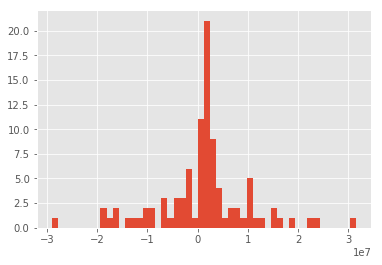

In [257]:
print(np.mean(np.abs(y_test-y_regRFF_pred)))
plt.hist(y_test-y_regRFF_pred,bins=50);

## Fourth and Last (I hope): Support Vector Machine Regression

In [ ]:
# Load the library
from sklearn.svm import SVR
# Create an instance
regSVR = SVR(kernel="rbf",C=0.1)
# Fit the data
regSVR.fit(X_train,y_train)
# Do predictions
y_regSVR_pred = regSVR.predict(X_test)

In [ ]:
print(np.mean(np.abs(y_test-y_regSVR_pred)))
plt.hist(y_test-y_regSVR_pred,bins=50);